# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
import matplotlib.gridspec as gridspec
from skimage.color import rgb2gray


from sklearn import preprocessing
from scipy import ndimage

# Convolution
Hint: 
*   *convolve function is available in skimage.filters.edges module*

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to one.

### Question1: Shell you  normalize the mask before convolving the image with it? Why?
### Answer 1: Yes. We normalize this mask before because it is neccesary that the values sum of the values of the mask are one. This is because the range of the image after concolution will be out of range to store the image like uint8.

### Question2: What types the mask and the image should be? Justify your answer.
### Answer 2: 
The mask can be of N*M size but it is neccesary that the size be similar in size to the size of the output image and another key is that this matrix is normalized. On other hand, the image can have wherever value of size.



### Question3: What is the range of values before and after the convolution?
### Answer 3: The range of the image before the convolution is 256 and after isthe same.On other hand if we don't normalized the mask the range is more than 3500.

[[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]


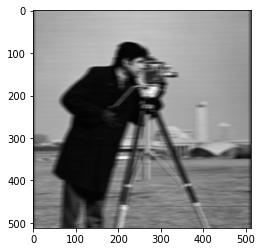

In [ ]:
# solution
camera = data.camera()
#Pass the the image to float
camera = camera.astype(float)
#Create the mask and then normalizes the mask
Horizontal_mask = np.ones((1,15))/15
#Convulation of the image
C_Conv_H = ndimage.convolve(camera,Horizontal_mask, mode='constant', cval=0.0)

plt.imshow(C_Conv_H,cmap='gray')
plt.show
print(Horizontal_mask)


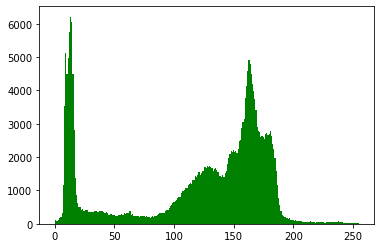

In [ ]:
before = plt.hist(camera.ravel(), bins = 256, color='g')

Spatial enhancement is a mathematical processing on the pixels of an image, in order to highlight certain types of relationships. For this, the so-called convolution masks or spatial filters are used, which are windows with values given by the type of spatial relationship to be highlighted.

*   Convolve the image with a vertical mask:  (15 x 1) with  values set to one

<function matplotlib.pyplot.show>

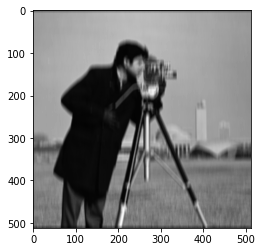

In [ ]:
# solution
Vertical_Mask = np.ones((15,1))/15
C_Conv_V = ndimage.convolve(camera,Vertical_Mask, mode='constant', cval=0.0)

plt.imshow(C_Conv_V, cmap='gray')
plt.show


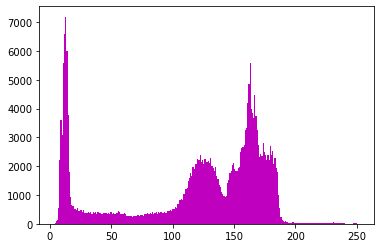

In [ ]:
after = plt.hist(C_Conv_V.ravel(), bins = 256, color='m',histtype='bar')

*   Convolve the image with a 2D mask:  (15 x 15) with  values set to one

(512, 512)


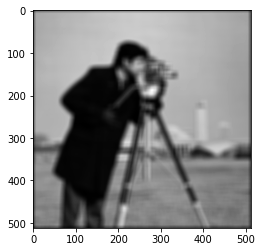

In [ ]:
# solution
TwoD_Mask = np.ones((15,15))/(15*15)
C_Conv_2d = ndimage.convolve(camera,TwoD_Mask, mode='constant', cval=0.0)
plt.imshow(C_Conv_2d,cmap='gray')
plt.show
print(C_Conv_2d.shape)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

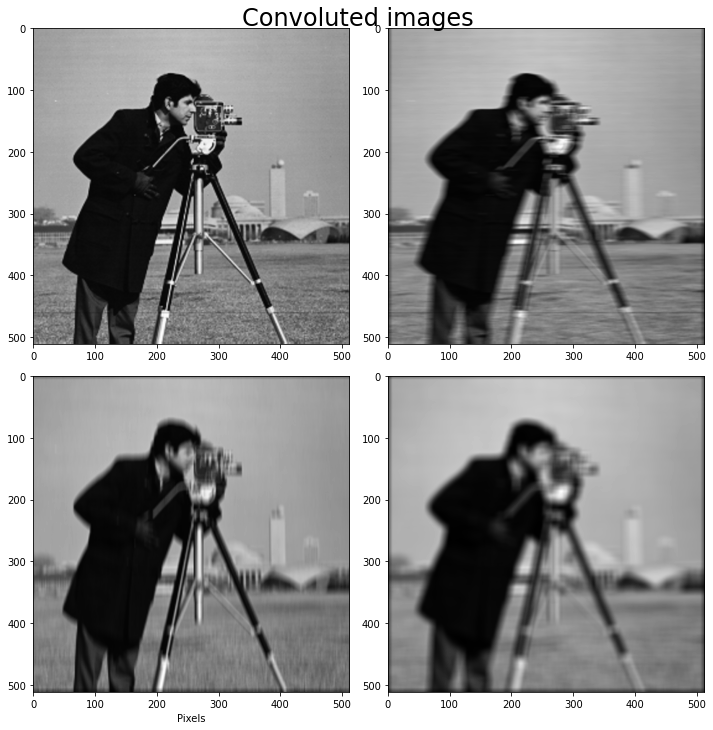

In [ ]:
# solution

#Plot 
plt.figure(figsize=(10, 10))
plt.suptitle('Convoluted images',y='1.01', size='24')

G = gridspec.GridSpec(2, 2)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(camera, cmap='gray')
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)

#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(C_Conv_H, cmap='gray')
#plt.text(0.5, 0.5, 'Gray Scale', ha='center', va='center', size=20, alpha=.5)

#Picture No.3
axes_3 = plt.subplot(G[1, 0])
# We Compute the histogram of the image.
plt.imshow(C_Conv_V, cmap='gray')
#plt.text(0.5, 0.5, 'Histogram Original', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Pixels')


#Picture No.4
axes_4 = plt.subplot(G[1, 1])
plt.imshow(C_Conv_2d, cmap='gray')
#plt.text(0.5, 0.5, 'Histogram gray scale', ha='center', va='center', size=20, alpha=.5)



plt.tight_layout()

plt.show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


0.9999999999999999
255.0
232.2177777777777


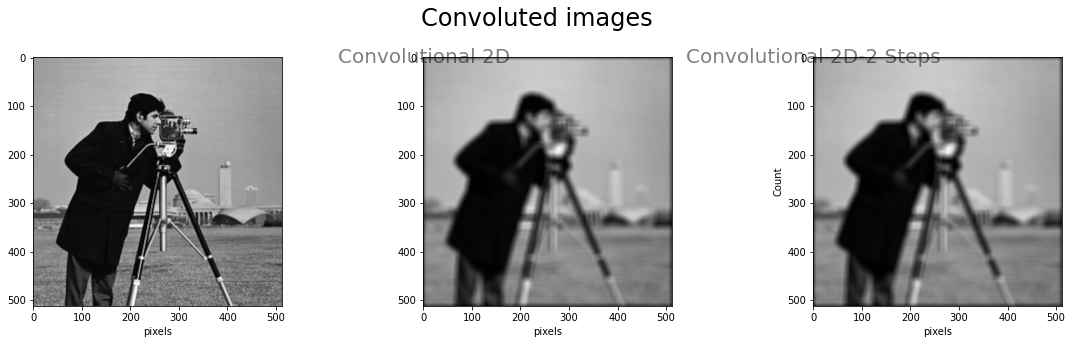

In [ ]:
# solution

H_mask = np.ones((1,15))
H_mask = H_mask/H_mask.sum()
print(H_mask.sum())
V_mask = np.ones((15,1))/15


C_Conv_1 = ndimage.convolve(camera,H_mask, mode='constant', cval=0.0)
C_Conv_2 = ndimage.convolve(C_Conv_1,V_mask, mode='constant', cval=0.0)
 
print(camera.max()) 
print(C_Conv_2.max())


#Plot 
plt.figure(figsize=(15, 5))
plt.suptitle('Convoluted images',y='1.01', size='24')

G = gridspec.GridSpec(1, 3)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(camera, cmap='gray')
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('pixels')

#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(C_Conv_2d, cmap='gray')
plt.text(0.5, 0.5, 'Convolutional 2D', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('pixels')
#Picture No.3
axes_3 = plt.subplot(G[0, 2])
# We Compute the histogram of the image.
plt.imshow(C_Conv_2, cmap='gray')
plt.text(0.5, 0.5, 'Convolutional 2D-2 Steps', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('pixels')
plt.ylabel('Count')



plt.tight_layout()

plt.show()

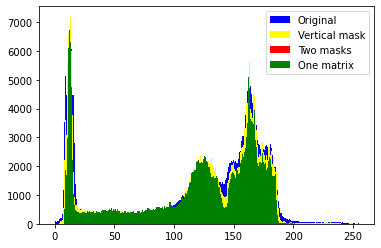

In [ ]:
x= plt.hist(camera.ravel(), bins = 256, color='blue')
x= plt.hist(C_Conv_V.ravel(), bins = 256, color='yellow')
x= plt.hist(C_Conv_2.ravel(), bins = 256, color='red')
x= plt.hist(C_Conv_2d.ravel(), bins = 256, color='green')
x = plt.legend(['Original', 'Vertical mask', 'Two masks', 'One matrix'])

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**
As we can see in the previus histogram is the same result but with different methods. In the first case, we deliver an array like mask of [ 1x15] and with that proceded to convolution the image, them we apply another array of [15x1] in the previus result to convolution again, with all of that we obtain how final an image convoilutioneted by two arrays or one matrix of [15,15]. 

...

# Image Blurring




 An image looks more sharp or more detailed if we are able to perceive all the objects and their shapes correctly in it.

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Shell you convert the image into grayscale?
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

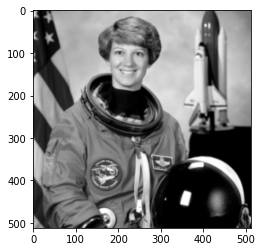

In [ ]:
# solution
from skimage.filters import gaussian

astronaut = rgb2gray(data.astronaut())
astronaut = astronaut.astype(float)
plt.imshow(astronaut,cmap='gray')
sigma = (1)

astro_Gausian_1 = gaussian(astronaut, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
plt.imshow(astro_Gausian_1,cmap='gray')

*   Why is blurring important?


**Solution**

*Blurring can be very important because we can remove noise from an image while leaving other parts of the image intact. Another reason to use blurring is to obtain perform to apply edge detection.*

...

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

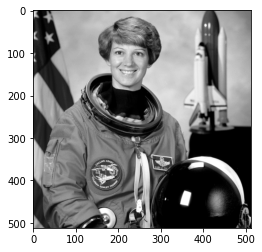

In [ ]:
# solution
astro_Gausian_0 = gaussian(astronaut, sigma=0, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
plt.imshow(astro_Gausian_0,cmap='gray')


*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

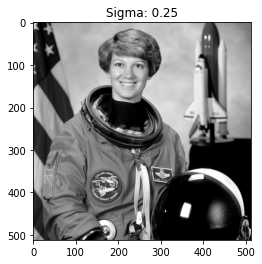

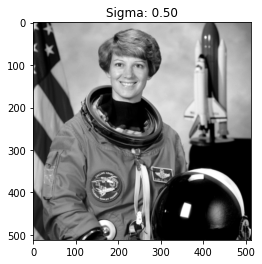

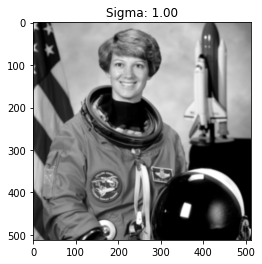

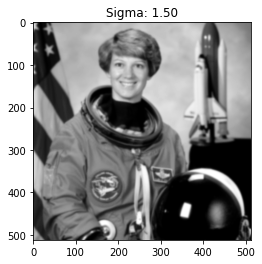

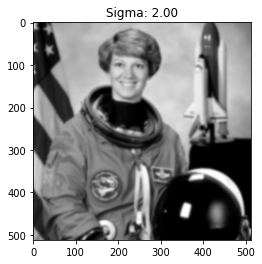

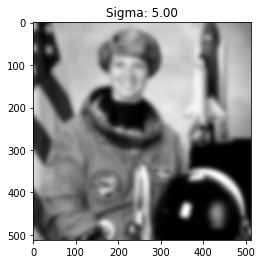

In [ ]:
# solution
m = astronaut.shape
sigmaGausian = np.array([0.25, 0.5, 1, 1.5, 2, 5])

astro_Gausian= np.zeros((m[0],m[1],len(sigmaGausian)))

for i in range(len(sigmaGausian)):
  astro_Gausian[:,:,i] = gaussian(astronaut, sigma=sigmaGausian[i], output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
  plt.imshow(astro_Gausian[:,:,i],cmap='gray')
  plt.title('Sigma: %.2f' %sigmaGausian[i])
  plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

*When we large the sigma value we can percibe more blur in the image and if we decreas that parameter the blur is minimized.

The sigma value control how the kernel function and the values blur increas or decreas. The better way to determine the optimal sigma value it's depend of the resolution of the image and how far we need the edge detection.

*


### Exercise: Median Filter

*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Shell you convert the 'astronauts' image to grayscale?
*   Visualize the original image and the filtered image matplotlib subplot.

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


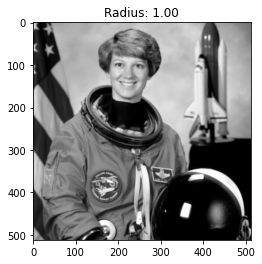

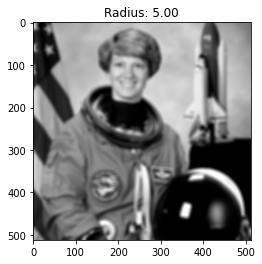

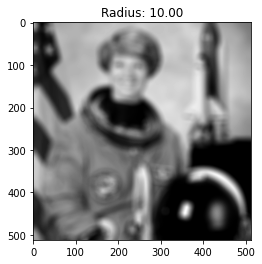

In [ ]:
# solution
astro_gray = rgb2gray(astronaut)
radius = np.array([1,5,10])
m = astronaut.shape

astro_radius = np.zeros((m[0],m[1],len(radius)))

for i in range(len(radius)):
  selem_calcu= morphology.selem.disk(radius[i])
  astro_radius[:,:,i]= filters.rank.mean(astro_gray, selem = selem_calcu)
  plt.imshow(astro_radius[:,:,i],cmap='gray')
  plt.title('Radius: %.2f' %radius[i])
  plt.show()



*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


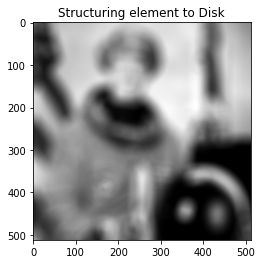

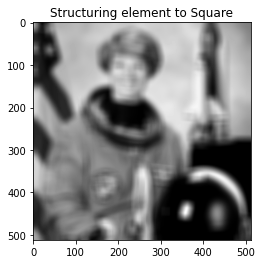

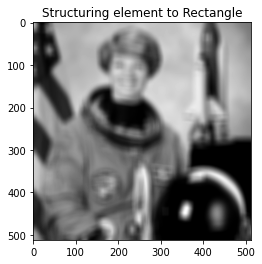

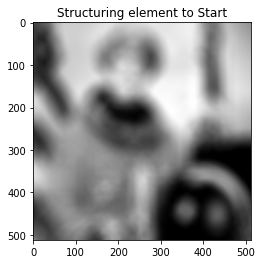

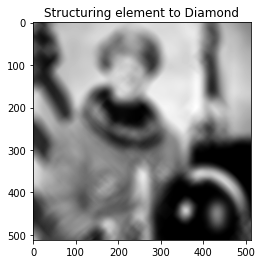

In [ ]:
# solution

width = 20
height = 15
selem1 = morphology.selem.disk(20)
selem2 = morphology.selem.square(width)
selem3 = morphology.selem.rectangle(width, height)
selem4 = morphology.selem.star(20)
selem5 = morphology.selem.diamond(20)

structure = ['Structuring element to Disk', 'Structuring element to Square','Structuring element to Rectangle','Structuring element to Start','Structuring element to Diamond']

selem_array =([selem1,selem2,selem3,selem4,selem5])
struct = np.zeros((m[0],m[1],5))


for i in range(5):
  struct[:,:,i] = filters.rank.mean(astro_gray, selem = selem_array[i])
  plt.imshow(struct[:,:,i], cmap='gray')
  plt.title(structure[i])
  plt.show()

*   What is the effect of the structuring element on the median filter?


**Solution**

*The effect of these structuring elements is to obtain different patterns of blur with shapes. *

*   What is the difference between the gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

The Gaussian Filter is similar to the mean filter however it involves a weighted average of the surrounding pixels and has a parameter sigma. The kernel represents a discrete approximation of a Gaussian distribution. While the Gaussian filter blurs the edges of an image (like the mean filter) it does a better job of preserving edges than a similarly sized mean filter.


When we need to denoise low frequencies the Gaussian filter is the best option because using the Fourier is transformed to a low-pass filter, allowing only low frequencies to survive.

The median filter is normally used to reduce noise in an image, somewhat like the mean filter. However, it often does a better job than the mean filter of preserving useful detail in the image.


Like the mean filter, the median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values. The median is calculated by first sorting all the pixel values from the surrounding neighborhood into numerical order and then replacing the pixel being considered with the middle pixel value.

Mean filtering is most commonly used as a simple method for reducing noise in an image, for example with salt and pepper, however, its results don't be good, because, when the filter neighborhood straddles an edge, the filter will interpolate new values for pixels on the edge and so will blur that edge. This may be a problem if sharp edges are required in the output.

...

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

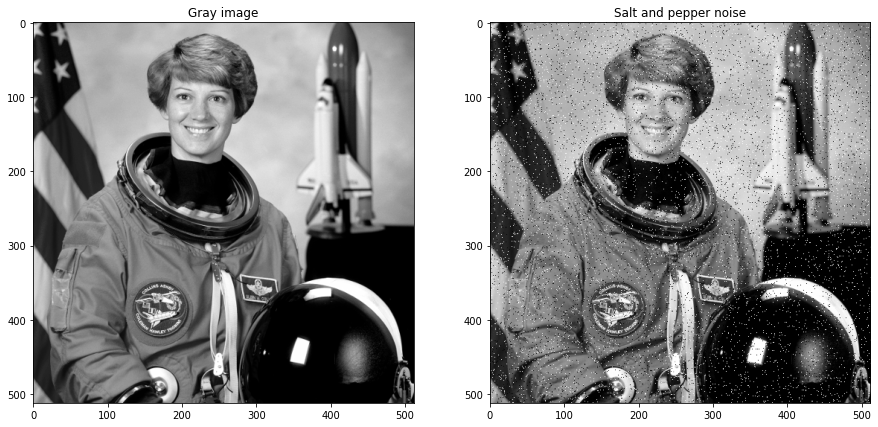

In [ ]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise.
*   Apply the mean filter, median filter and gaussian filter in each of the noisy images.
*   Repeat the same on a noisy images with **salt and pepper** noise.
*   Visualize the images and observe the difference in each filter with respect to the noise.

In [ ]:

# solution
from scipy.signal import convolve2d
from skimage.util import random_noise

catgray = rgb2gray(data.chelsea())

## Gausian noise
#Create a gaussian noise

noise_gs = random_noise(catgray, mode='gaussian') 
cat_noise_gs = filters.rank.mean(noise_gs, morphology.diamond(5))


## Mean filter
Ksize = 8
kernel = np.ones((Ksize,Ksize))
kernel /= kernel.sum()
mean_filter = convolve2d(cat_noise_gs, kernel)


## Median filter    -A median filter preserves better the edges:
median_filter = ndimage.median_filter(cat_noise_gs, 3)



##Gaussian filter   -A Gaussian filter smoothes the noise out… and the edges as well:

gaussian_filter1 = gaussian(cat_noise_gs, sigma=3, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
gaussian_filter2 = ndimage.gaussian_filter(cat_noise_gs, sigma=3)


/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


In [ ]:
# We repeat the same in noisy images with salt and pepper noise.
salt_cat_peper = random_noise(catgray, mode='s&p')  # salt and pepper noise is added
## Mean filter
Ksize = 5
kernel = np.ones((Ksize,Ksize))
kernel /= kernel.sum()
mean_filter_SP = convolve2d(salt_cat_peper, kernel)
## Median filter    -A median filter preserves better the edges:
median_filter_SP = ndimage.median_filter(salt_cat_peper, 3)

##Gaussian filter   -A Gaussian filter smoothes the noise out… and the edges as well:

gaussian_filter1_SP = gaussian(salt_cat_peper, sigma=3, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
gaussian_filter2_SP = ndimage.gaussian_filter(salt_cat_peper, sigma=3)




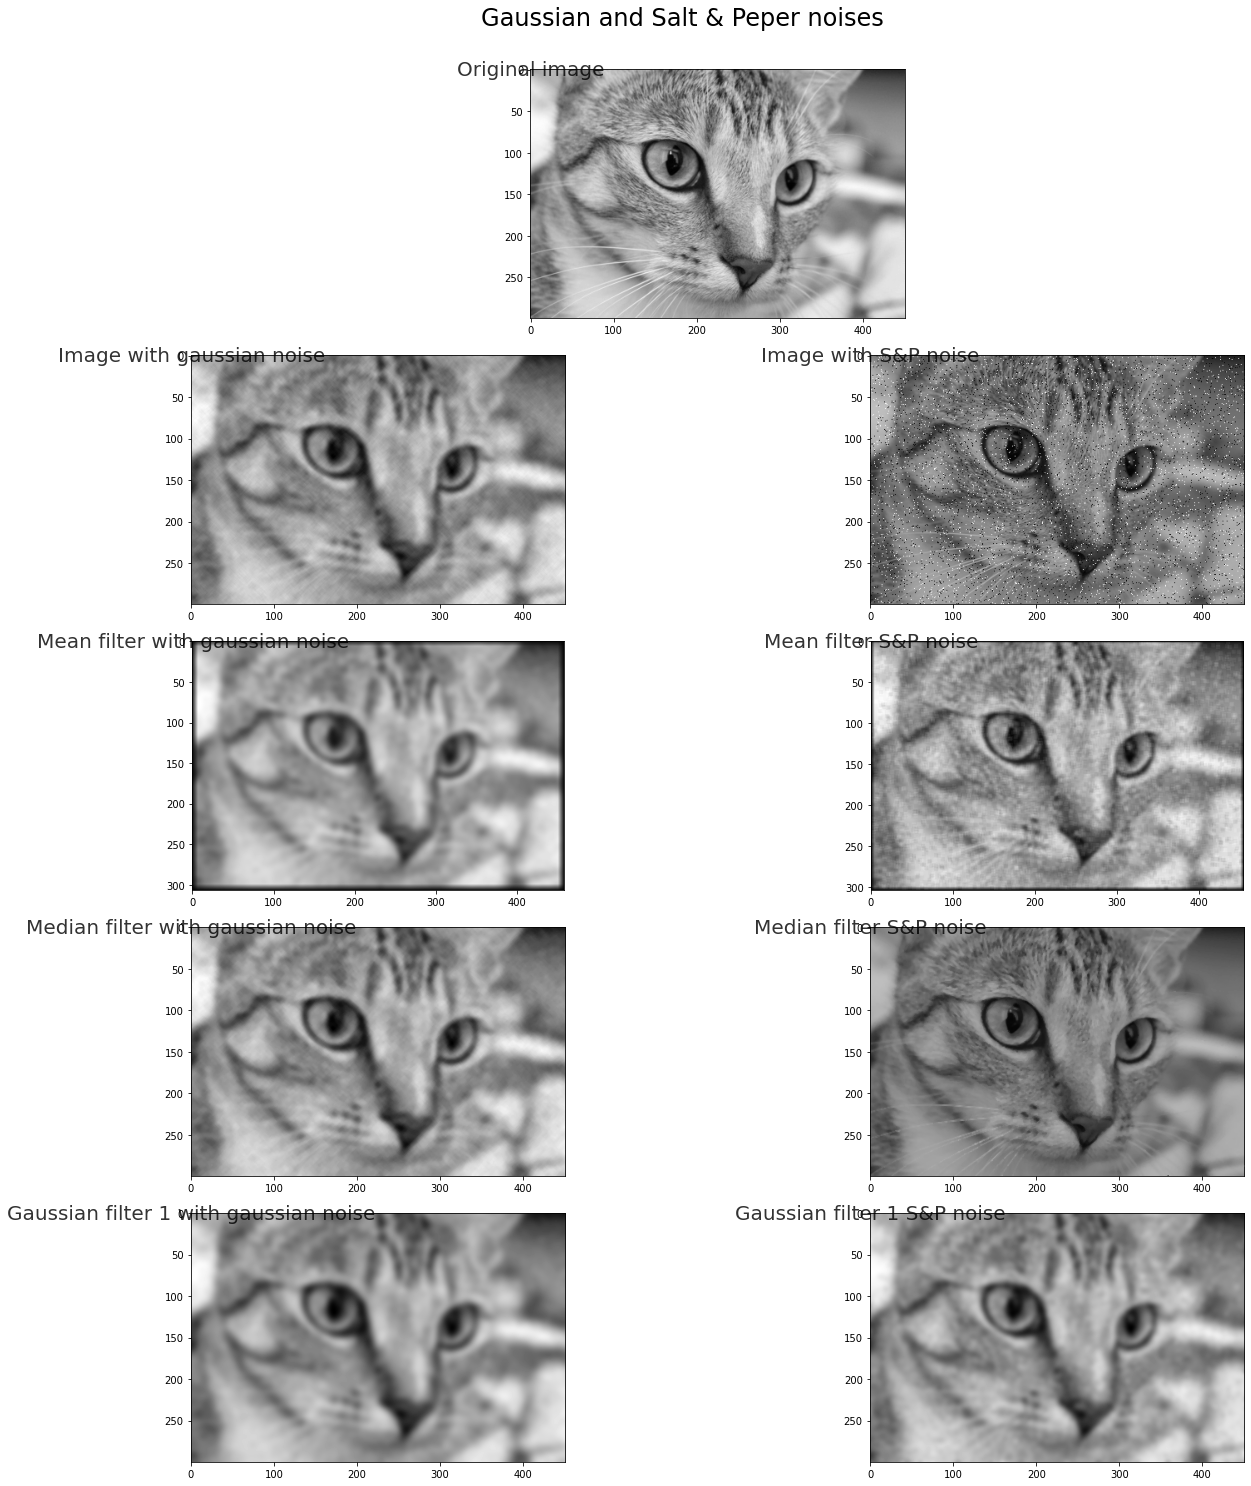

In [ ]:
#Plot 
plt.figure(figsize=(20, 20))
plt.suptitle('Gaussian and Salt & Peper noises', size='24', y='1.03')
G = gridspec.GridSpec(5, 2)
#Picture No.1
axes_1 = plt.subplot(G[0,:])
plt.imshow(catgray, cmap='gray')
plt.text(0.5, 0.5, 'Original image', ha='center', va='center', size=20, alpha=.8)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.imshow(cat_noise_gs, cmap='gray')
plt.text(0.5, 0.5, 'Image with gaussian noise', ha='center', va='center', size=20, alpha=.8)
#Picture No.3
axes_3 = plt.subplot(G[1, 1])
plt.imshow(salt_cat_peper, cmap='gray')
plt.text(0.5, 0.5, 'Image with S&P noise', ha='center', va='center', size=20, alpha=.8)
#Picture No.4
axes_4 = plt.subplot(G[2,0])
plt.imshow(mean_filter, cmap='gray')
plt.text(0.5, 0.5, 'Mean filter with gaussian noise', ha='center', va='center', size=20, alpha=.8)

#Picture No.5
axes_5 = plt.subplot(G[2,1])
plt.imshow(mean_filter_SP, cmap='gray')
plt.text(0.5, 0.5, 'Mean filter S&P noise', ha='center', va='center', size=20, alpha=.8)

#Picture No.6
axes_6 = plt.subplot(G[3,0])
plt.imshow(median_filter, cmap='gray')
plt.text(0.5, 0.5, 'Median filter with gaussian noise', ha='center', va='center', size=20, alpha=.8)

#Picture No.7
axes_7 = plt.subplot(G[3,1])
plt.imshow(median_filter_SP, cmap='gray')
plt.text(0.5, 0.5, 'Median filter S&P noise', ha='center', va='center', size=20, alpha=.8)

#Picture No.8
axes_8 = plt.subplot(G[4,0])
plt.imshow(gaussian_filter1, cmap='gray')
plt.text(0.5, 0.5, 'Gaussian filter 1 with gaussian noise', ha='center', va='center', size=20, alpha=.8)

#Picture No.9
axes_9 = plt.subplot(G[4,1])
plt.imshow(gaussian_filter1_SP, cmap='gray')
plt.text(0.5, 0.5, 'Gaussian filter 1 S&P noise', ha='center', va='center', size=20, alpha=.8)

plt.tight_layout()
plt.show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

For both cases we consider that the median filter is the best option. In the image with Gaussian noise it does not improve much, but in the image with salt and pepper noise it disappears significantly.

...

# Edge Detection

### Exercise:
*   Read the 'camera' image from the data module
*   Perform sobel and prewitt edge detection on the image
*   Compare the buildin function performance vs applying a convolution with the Sobel/Prewitt mask
*   Visualize the original image, the edges and the edges superimposed on the original image

In [ ]:
# solution
camera = data.camera()

sobel_edge = filters.sobel(camera)
prewitt_edge = filters.prewitt(camera)

#Sobel selfmade
mask_sbl_h = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]], dtype='float64')
edg_sbl_h = filters.edges.convolve(camera,mask_sbl_h)

mask_sbl_v = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]], dtype='float64')
edg_sbl_v = filters.edges.convolve(camera,mask_sbl_v)

sobel_convolution = np.sqrt( edg_sbl_h**2 + edg_sbl_v**2).astype(dtype= 'float64') 


#Prewitt selfmade
mask_pwt_h = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]], dtype='float64')
edg_pwt_h = filters.edges.convolve(camera,mask_pwt_h)

mask_pwt_v = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]], dtype='float64')
edg_pwt_v = filters.edges.convolve(camera,mask_pwt_v)

prewitt_convolution = np.sqrt(edg_pwt_h**2 + edg_pwt_v**2).astype(dtype= 'float64') 



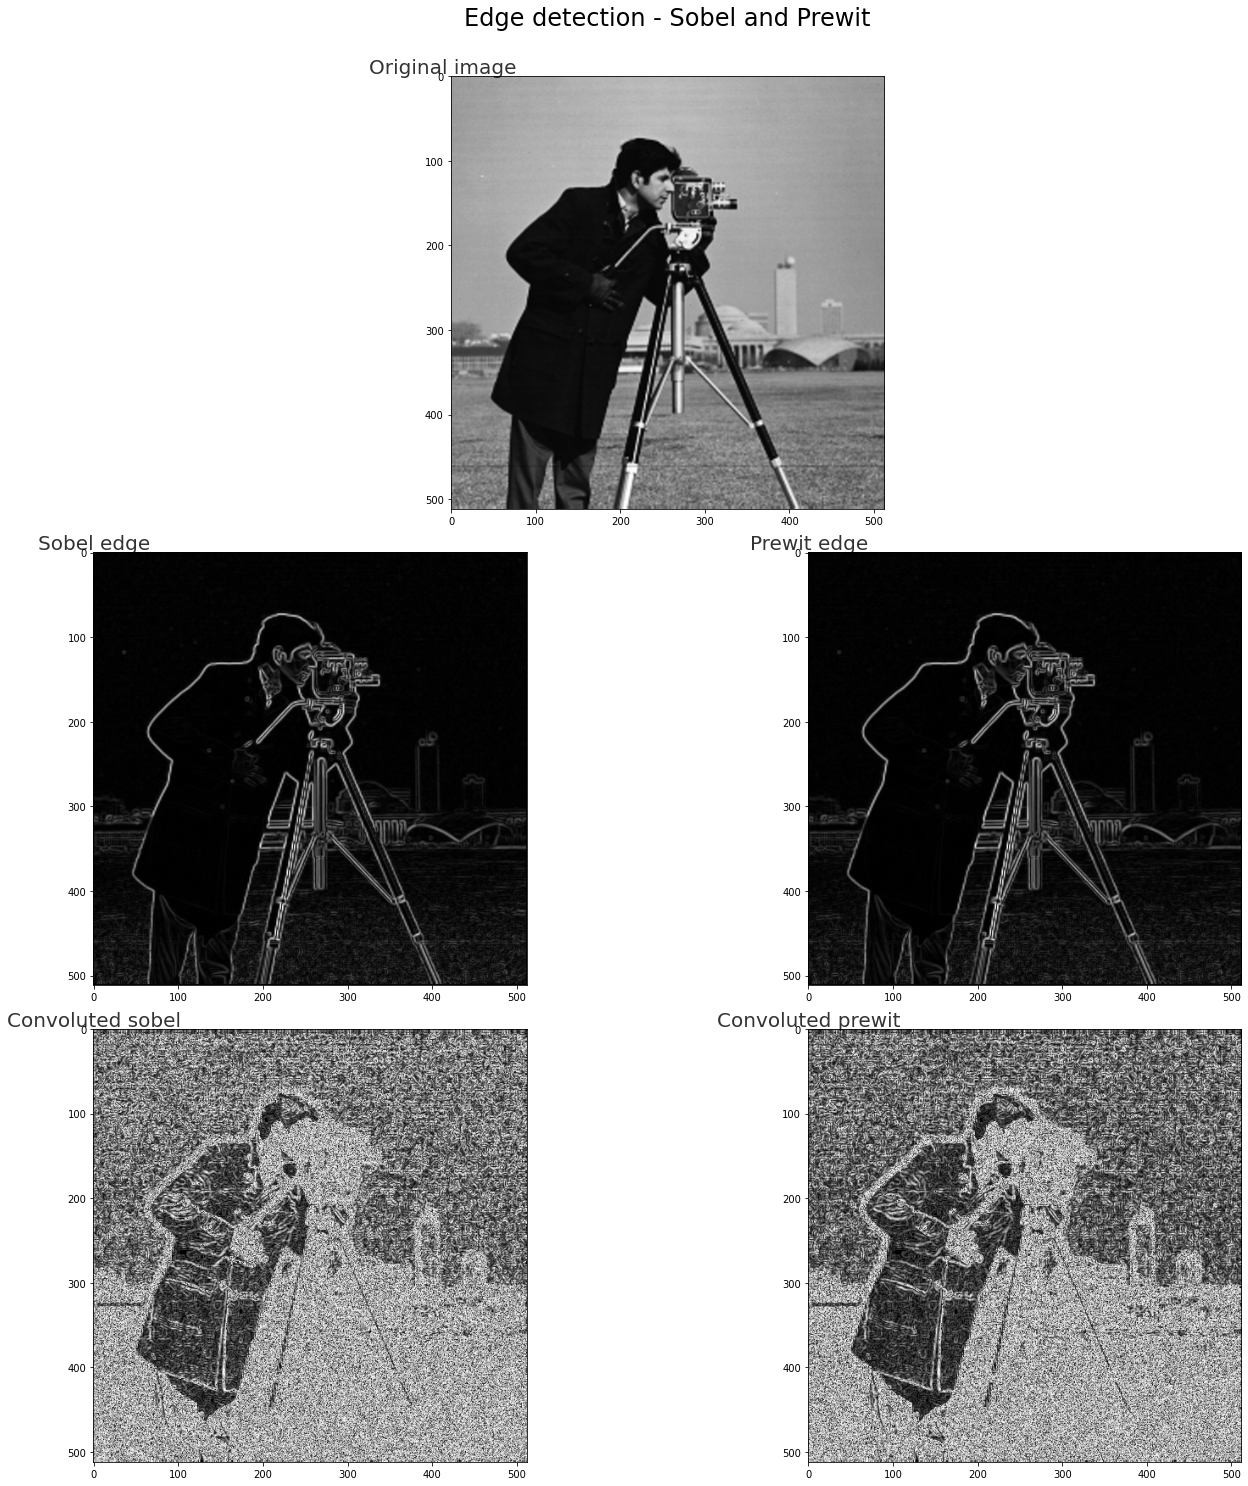

In [ ]:
#Plot 
plt.figure(figsize=(20, 20))
plt.suptitle('Edge detection - Sobel and Prewit', size='24', y='1.03')
G = gridspec.GridSpec(3, 2)
#Picture No.1
axes_1 = plt.subplot(G[0,:])
plt.imshow(camera, cmap='gray')
plt.text(-10, -10, 'Original image', ha='center', va='center', size=20, alpha=.8)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.imshow(sobel_edge, cmap='gray')
plt.text(0.5, -10, 'Sobel edge', ha='center', va='center', size=20, alpha=.8)
#Picture No.3
axes_3 = plt.subplot(G[1, 1])
plt.imshow(prewitt_edge, cmap='gray')
plt.text(0.5, -10, 'Prewit edge', ha='center', va='center', size=20, alpha=.8)
#Picture No.4
axes_4 = plt.subplot(G[2,0])
plt.imshow(sobel_convolution, cmap='gray')
plt.text(0.5, -10, 'Convoluted sobel', ha='center', va='center', size=20, alpha=.8)

#Picture No.5
axes_5 = plt.subplot(G[2,1])
plt.imshow(prewitt_convolution, cmap='gray')
plt.text(0.5, -10, 'Convoluted prewitt', ha='center', va='center', size=20, alpha=.8)

plt.tight_layout()
plt.show()


*   What is the difference between each of the edge detectors?
*   What do you think is the limitation of each of the detector?



**Solution**

*Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images. However, unlike the Sobel, this operator does not place any emphasis on the pixels that are closer to the center of the mask.


The sobel is one of the most commonly used edge detectors. It is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical direction and is therefore relatively inexpensive in terms of computations. The Sobel edge enhancement filter has the advantage of providing differentiating (which gives the edge response) and smoothing (which reduces noise) concurrently.

Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images. However, unlike the Sobel, this operator does not place any emphasis on the pixels that are closer to the center of the mask.


*

...

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply the Canny operator with default parameters
*   Apply the Canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.


The Canny filter is a multi-stage edge detector. It uses a filter based on the derivative of a Gaussian in order to compute the intensity of the gradients.The Gaussian reduces the effect of noise present in the image. Then, potential edges are thinned down to 1-pixel curves by removing non-maximum pixels of the gradient magnitude. Finally, edge pixels are kept or removed using hysteresis thresholding on the gradient magnitude.
The Canny has three adjustable parameters: the width of the Gaussian (the noisier the image, the greater the width), and the low and high threshold for the hysteresis thresholding.

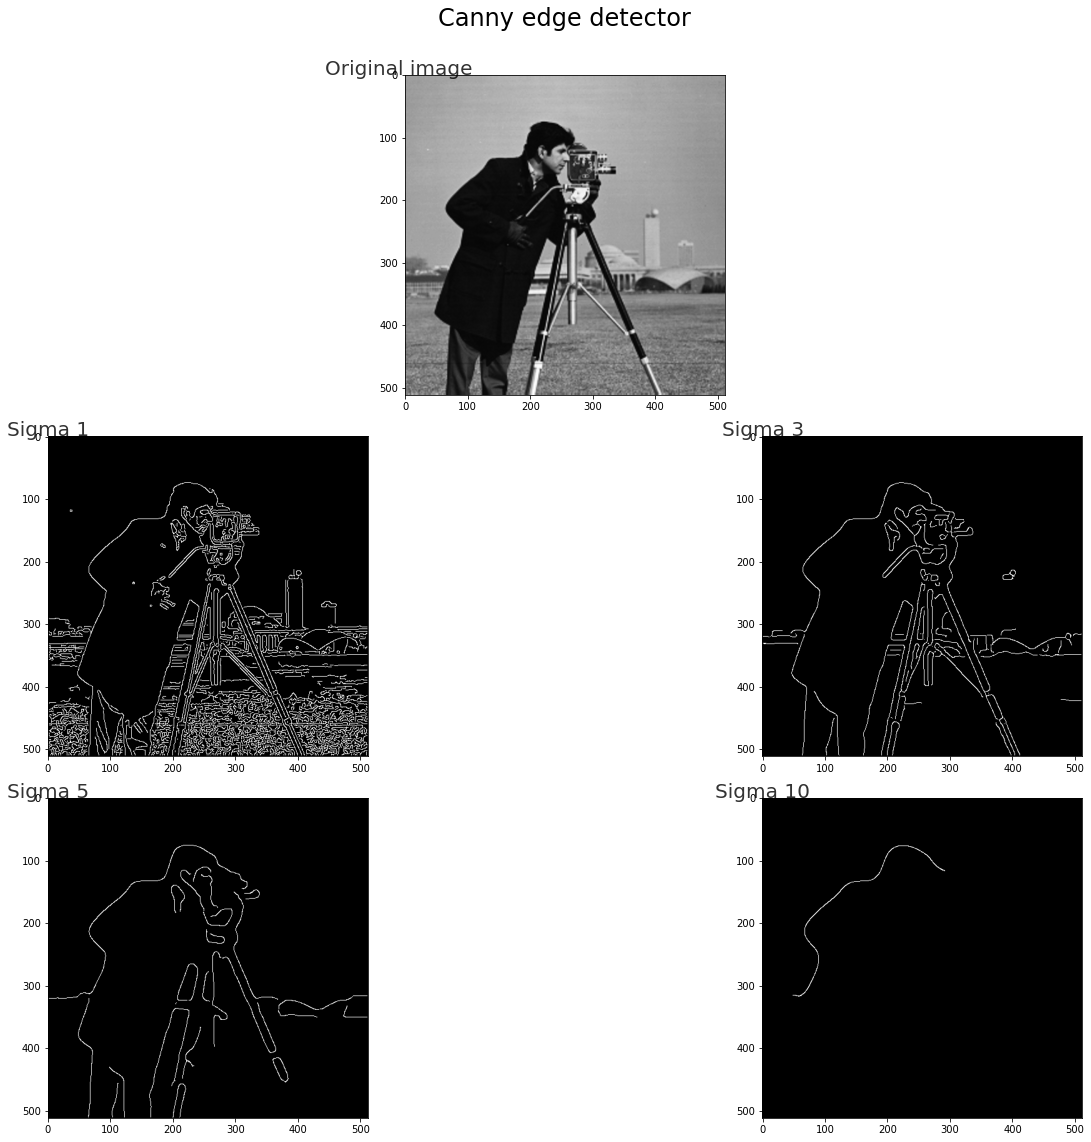

In [ ]:
# solution

cameraMan = data.camera()
#Plot 
plt.figure(figsize=(20, 20))
plt.suptitle('Canny edge detector', size='24', y='1.03')
G = gridspec.GridSpec(4, 2)

#Picture No.1
axes_1 = plt.subplot(G[0,:])
plt.imshow(cameraMan, cmap='gray')
plt.text(-10, -10, 'Original image', ha='center', va='center', size=20, alpha=.8)

#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.imshow(feature.canny(cameraMan, sigma=1), cmap='gray')
plt.text(0.5, -10, 'Sigma 1', ha='center', va='center', size=20, alpha=.8)

#Picture No.3
axes_3 = plt.subplot(G[1, 1])
plt.imshow(feature.canny(cameraMan, sigma=3), cmap='gray')
plt.text(0.5, -10, 'Sigma 3', ha='center', va='center', size=20, alpha=.8)
#Picture No.4
axes_4 = plt.subplot(G[2,0])
plt.imshow(feature.canny(cameraMan, sigma=5), cmap='gray')
plt.text(0.5, -10, 'Sigma 5', ha='center', va='center', size=20, alpha=.8)

#Picture No.5
axes_5 = plt.subplot(G[2,1])
plt.imshow(feature.canny(cameraMan, sigma=10), cmap='gray')
plt.text(0.5, -10, 'Sigma 10', ha='center', va='center', size=20, alpha=.8)

#Picture No.6
#axes_5 = plt.subplot(G[3,:])
#plt.imshow(feature.canny(data.(), sigma=3))
#plt.text(0.5, -10, 'Colorfull ', ha='center', va='center', size=20, alpha=.8)


plt.tight_layout()
plt.show()






*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?
*   Does the Canny operator work on color images?


**Solution**



### Answer 1:
When we varying the sigma value it is possible to obtain an image with more details or more simple, but imagine that it is neccesary detect the shape of something or someone and we can percibe that the image have others things on the target that we can detect, if we increass the sigma value we can get a better edge of the object and the other things disapper because we consider that like noise. On other hand, if we decress the sigma value we can get more datails from the image. This parameter depends of the task that we are developed. 
### Answer 2:
Upper threshold based on the max intensity

lower threshold based on some percentage of the upper threshold

Use the high threshold to start edge curves and the low threshold to continue them.
 
### Answer 3:
 The parameter `image` must be a 2-dimensional array for that reason we need to convert image in gray color.
...
...

*   What is the algorithm behind the Canny operator?


**Solution**



### Answer 1:
The algorithm behind the Canny operator works in a multi-stage process, so, the image is smoothed by Gaussian convolution, and then a simple 2-D first derivative operator is applied to the regions with more highlight for high first spatial derivatives. 

Now the algorithm tracks along with the image how is the ridges and the other put to zero all the pixels that are not actually on the ridge top. At the final, we obtain a thin line in the output. 



---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Monday, the 25th of October, 2021**
